# Caos I: la ecuación de Lorenz

## **Ejercicio 1)** Importando librerías

**1)** Importe las librerías `numpy` para operar con arrays, `scipy.signal` para analizar señales de datos y `matplotlib.pyplot` para graficar.

**2)** Suba el archivo "libreria" `ode.py` que fabricó en el práctico 4), e impórtelo.

In [1]:
# a)
import numpy as np
#import scipy as sp
import scipy.signal as sgn
#import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
# b)
#import ode

def euler(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Euler.

    Argumentos de entrada:

        f : R^n,R -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Euler.

    # Ejemplos:
    """
    return x+h*f(x,t,p)

def rk4(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.

    Argumentos de entrada:

        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Runge-Kutta de orden 4.

    # Ejemplos:
    """
    k1 = f(x,t,p)
    k2 = f(x+0.5*h*k1,t+0.5*h,p)
    k3 = f(x+0.5*h*k2,t+0.5*h,p)
    k4 = f(x+h*k3,t+h,p)
    return x+h*(k1+2.0*k2+2.0*k3+k4)/6.0

def integrador_ode(m,f,xa,a,b,k,p,c=lambda x,t,p:x):
    """
    Integra numéricamente la ODE

        dx/dt = f(x,t)

    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.

    Argumentos de entrada:

        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        xa = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q
        c = función condicionante : R^n,R,p -> R^n

    Retorna:

        t : R^{k+1} , t_j = a+j*h para j=0,1,...,k
        w : R^{n,k+1} , w_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k

    donde a+k*dt = b.
    """
    assert k>0
    n = len(xa)
    h = (b-a)/k
    w = np.zeros((n,k+1)) # Produce un array con forma y tipo especificada con los parametros,
                          # lleno de ceros. la forma puede ser espcificada con un entero o tupla (n,k+1)
    t = np.zeros(k+1)
    w[:,0] = xa           # actualiza la posicion inicial (columna de indice 0) de las variables con los valores
                          # de las condiciones iniciales
    t[0] = a              # actualiza la posicion cero con el valor del tiempo inicial

    for j in range(k):    #Aca se produce la iteración en j

        t[j+1] = t[j] + h                # iteracion tiempo
        w[:,j+1] = m(f,w[:,j],t[j],h,p)  # iteracion de w
        w[:,j+1] = c(w[:,j+1],t[j+1],p)  # condicion sobre w

    return t,w

## Ejercicio 2)

Considere el sistema de Ecuaciones Diferenciales Ordinarias de Lorenz

\begin{eqnarray}
\frac{dx}{dt} & = & s(y-x) \\
\frac{dy}{dt} & = & rx-y-xz \\
\frac{dz}{dt} & = & xy-bz
\end{eqnarray}

Sea $p=(s,r,b)$ el vector de parámetros.

**1)**
Usando el método de Runge-Kutta de orden 4, resuelva la ODE para las siguientes elecciones de las condiciones iniciales, de los parámetros y del intervalo de tiempo de integración:

&nbsp; &nbsp; **i)** $(x(0),y(0),z(0))=(1,0.5,0.1)$, $p=(10,0.5,8/3)$ y $t\in [0,10]$.

&nbsp; &nbsp; **ii)** $(x(0),y(0),z(0))=(1,0.5,0.1)$, $p=(10,10,8/3)$ y $t\in [0,20]$.

&nbsp; &nbsp; **iii)** $(x(0),y(0),z(0))=(1,0.5,0.1)$, $p=(10,28,8/3)$ y $t\in [0,50]$

**2)** Para cada caso calculado en el inciso **1)**, grafique, en un mismo gráfico, las curvas en función del tiempo $x(t)$ vs $t$, $y(t)$ vs $t$ y $z(t)$ vs $t$.

**3)**
Para cada caso calculado en el inciso **1)**, grafique paramétricamente en función del tiempo, y en 3 dimensiones, el vector que describe la trayectoria de la solución, i.e. grafique $(x(t),y(t),z(t))$ vs $t$.

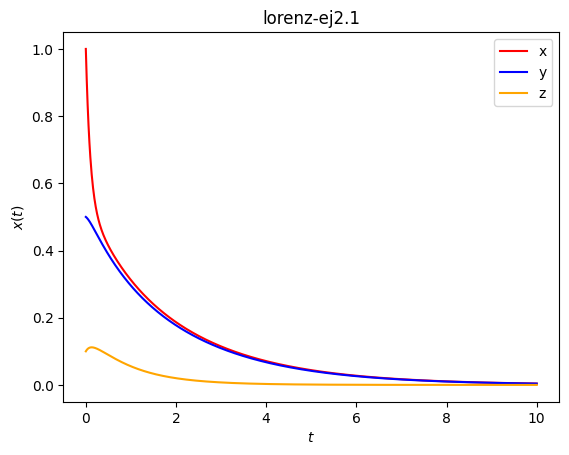

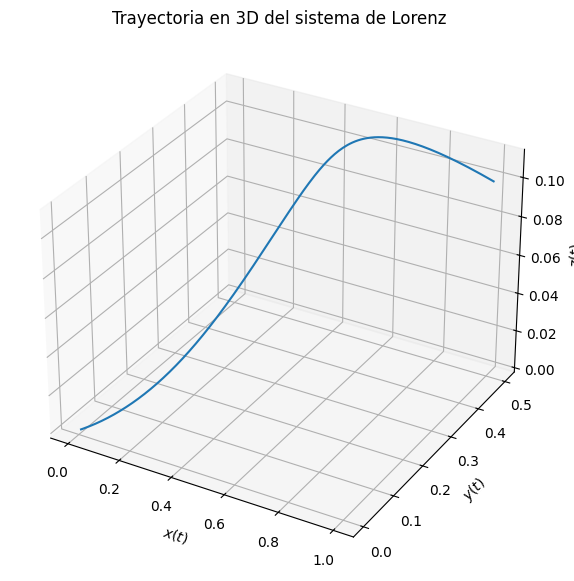

In [46]:
# 2.1)
def f_lorenz(x,t,p):
    s,r,b = p
    x_t,y_t,z_t = x
    return np.array([
                    s * (y_t - x_t),
                    r * x_t - y_t - x_t * z_t,
                    x_t * y_t - b * z_t
                    ])
    


T = 10
h = 0.01
k = int(T/h)
xa = np.array([1,0.5,0.1])
p = [10,0.5,8/3]
t,w = integrador_ode(rk4,f_lorenz,xa,0,T,k,p)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="x",linestyle='-',c='red')
plt.plot(t,w[1,:],label="y",linestyle='-',c='blue')
plt.plot(t,w[2,:],label="z",linestyle='-',c='orange')
plt.title('lorenz-ej2.1')
plt.legend()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(w[0,:], w[1,:], w[2,:])
ax.set_xlabel("$x(t)$")
ax.set_ylabel("$y(t)$")
ax.set_zlabel("$z(t)$")
ax.set_title("Trayectoria en 3D del sistema de Lorenz")

plt.show()

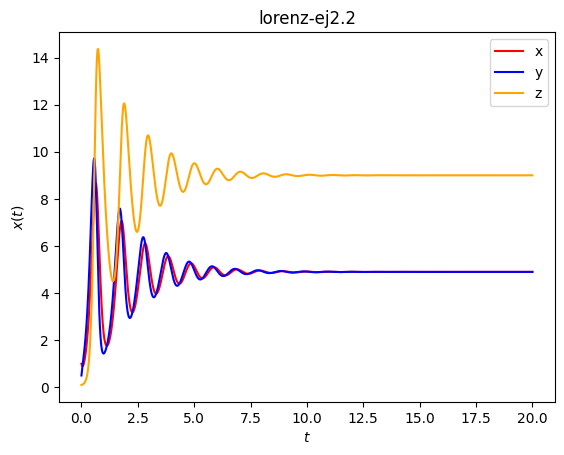

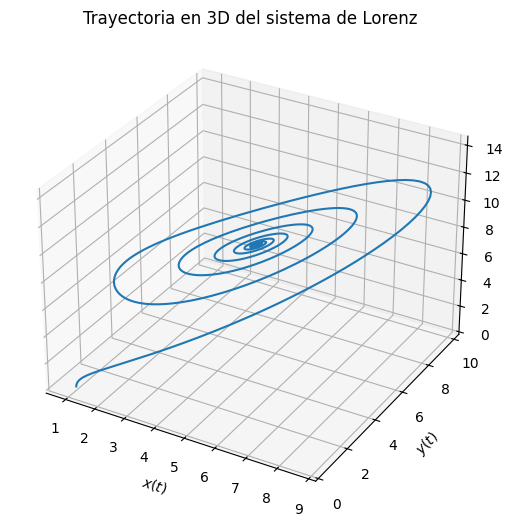

In [56]:
T = 20
h = 0.01
k = int(T/h)
xa = np.array([1,0.5,0.1])
p = [10,10,8/3]
t,w = integrador_ode(rk4,f_lorenz,xa,0,T,k,p)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="x",linestyle='-',c='red')
plt.plot(t,w[1,:],label="y",linestyle='-',c='blue')
plt.plot(t,w[2,:],label="z",linestyle='-',c='orange')
plt.title('lorenz-ej2.2')
plt.legend()


fig = plt.figure(figsize=(10,6.23))
ax = fig.add_subplot(111, projection='3d')

ax.plot(w[0,:], w[1,:], w[2,:])
ax.set_xlabel("$x(t)$")
ax.set_ylabel("$y(t)$")
ax.set_zlabel("$z(t)$")
ax.set_title("Trayectoria en 3D del sistema de Lorenz")

plt.show()

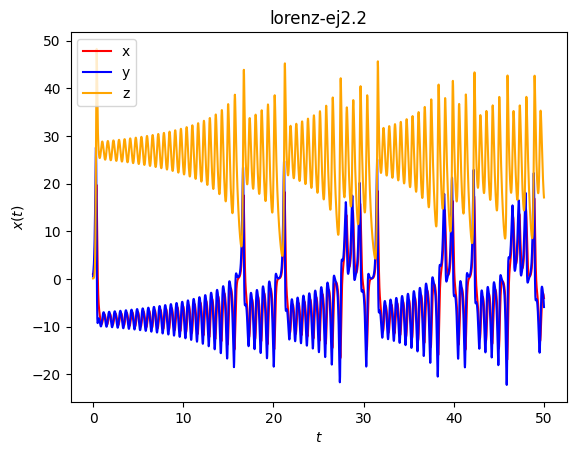

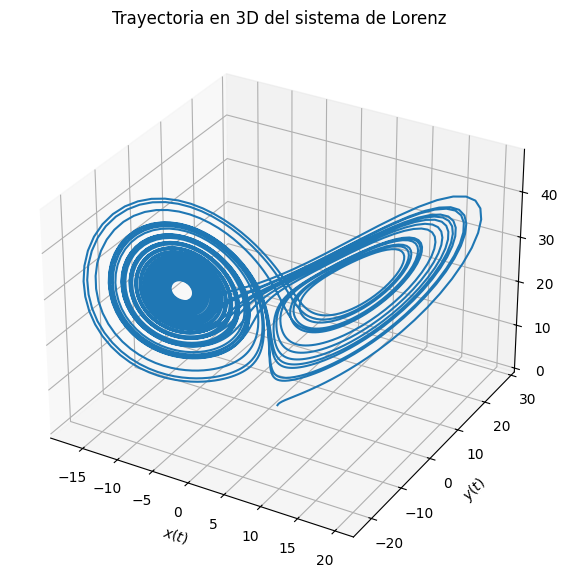

In [62]:
T = 50
h = 0.01
k = int(T/h)
xa = np.array([1,0.5,0.1])
p = [10,28, 8/3]
t,w = integrador_ode(rk4,f_lorenz,xa,0,T,k,p)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="x",linestyle='-',c='red')
plt.plot(t,w[1,:],label="y",linestyle='-',c='blue')
plt.plot(t,w[2,:],label="z",linestyle='-',c='orange')
plt.title('lorenz-ej2.2')
plt.legend()


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(w[0,:], w[1,:], w[2,:])
ax.set_xlabel("$x(t)$")
ax.set_ylabel("$y(t)$")
ax.set_zlabel("$z(t)$")
ax.set_title("Trayectoria en 3D del sistema de Lorenz")

plt.show()

## Ejercicio 3)

**1)** Repita el caso **1.iii)** del ejercicio **2)**, para $t\in [0,300]$, y eliminando el transiente que se observa antes de "converger" al atractor.

**2)** Identifique los máximos locales de la curva $z(t)$ obtenida en el inciso **1)**, y enumérelos como $z_1,z_2,...,z_i,...,z_n$.

**3)** Grafique $z_{i+1}$ vs $z_i$ para todo $i\in\{1,2,...,n-1\}$.

In [ ]:
# 3.1)

## Ejercicio 4)

**1)** Con la intención de imitar un set de datos, agregue ruido Gaussiano de varianza $\sigma^2=1$ a la curva $z(t)$ vs $t$ generada en el inciso **1)** del ejercicio **3)**. Llamaremos a esta nueva curva $\tilde{z}(t)$ vs $t$. Grafíquela.

**2)** Utilice algún algoritmo de suavizado de curvas (ver función `savgol_filter` de la librería `scipy.signal`) para suavizar $\tilde{z}(t)$ vs $t$. Llame $\hat{z}(t)$ vs $t$ a la curva suavizada.

**3)** Utilice la curva suavizada del inciso **2)** para identificar los tiempos $\hat{t}_1$,$\hat{t}_2$,...,$\hat{t}_n$ en los cuales ocurre los máximos locales $\hat{z}_1=\hat{z}(\hat{t}_1)$, $\hat{z}_2=\hat{z}(\hat{t}_2)$, ...,$\hat{z}_n=\hat{z}(\hat{t}_n)$ correspondientes.

Calcule además los valores de la curva sin suavizar en dichos tiempos, i.e. calcule $\tilde{z}_1=\tilde{z}(\hat{t_1})$, $\tilde{z}_2=\tilde{z}(\hat{t_2})$, ..., $\tilde{z}_n=\tilde{z}(\hat{t_n})$.

**4)** Grafique la curva suavizada $\tilde{z}(t)$ vs $t$.

Agregue al gráfico los máximos $(\tilde{z}_i,\hat{t}_i)$ con puntos azules, y los máximos $(\hat{z}_i,\hat{t}_i)$ con puntos rojos.

Que observa?

**5)** Grafique $\tilde{z}_{i+1}$ vs $\tilde{z}_i$ para todo $i\in\{1,2,...,n-1\}$.

**6)** Grafique $\hat{z}_{i+1}$ vs $\hat{z}_i$ para todo $i\in\{1,2,...,n-1\}$.

**7)** Comparando los resultados de los incisos **5)** y **6)** con los del gráfico del inciso **3)** del ejercicio **3)**.

Discuta y comente.

In [ ]:
# 4.1)

In [ ]:
# 4.7)

**Discusión:** Bla bla bla...